<a href="https://colab.research.google.com/github/Namrata-cse/Feature_selection_methods/blob/main/FS_Breastcancerdataset_Chi_Squared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
data = pd.read_csv("breast-cancer.csv")

In [49]:
print(data)

     '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'   'left_up'  \
0    '50-59'     'ge40'  '15-19'  '0-2'   'no'  '1'  'right'   'central'   
1    '50-59'     'ge40'  '35-39'  '0-2'   'no'  '2'   'left'  'left_low'   
2    '40-49'  'premeno'  '35-39'  '0-2'  'yes'  '3'  'right'  'left_low'   
3    '40-49'  'premeno'  '30-34'  '3-5'  'yes'  '2'   'left'  'right_up'   
4    '50-59'  'premeno'  '25-29'  '3-5'   'no'  '2'  'right'   'left_up'   
..       ...        ...      ...    ...    ...  ...      ...         ...   
280  '50-59'     'ge40'  '30-34'  '6-8'  'yes'  '2'   'left'  'left_low'   
281  '50-59'  'premeno'  '25-29'  '3-5'  'yes'  '2'   'left'  'left_low'   
282  '30-39'  'premeno'  '30-34'  '6-8'  'yes'  '2'  'right'  'right_up'   
283  '50-59'  'premeno'  '15-19'  '0-2'   'no'  '2'  'right'  'left_low'   
284  '50-59'     'ge40'  '40-44'  '0-2'   'no'  '3'   'left'  'right_up'   

      'no'     'recurrence-events'  
0     'no'  'no-recurrence-events'  
1     'no'   

In [51]:
data.head()

,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
0,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
1,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
2,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
3,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
4,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'


In [7]:
dataset = data.values

In [8]:
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [62]:
# format all fields as string
X = X.astype(str)
return X, y
 


SyntaxError: ignored

In [53]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (190, 9) (190,)
Test (95, 9) (95,)


use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.

The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

The function below named prepare_inputs() takes the input data for the train and test sets and encodes it using an ordinal encoding.

In [63]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

We also need to prepare the target variable.

It is a binary classification problem, so we need to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable.

The prepare_targets() function integer encodes the output data for the train and test sets.

In [55]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 

Chi-Squared method for categorical data

In [56]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [60]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


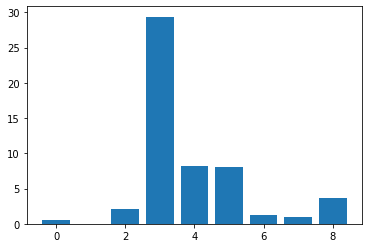

In [61]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [66]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79
